# Aprovacao

### Libraries

In [46]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

### EDA

In [2]:
ap = pd.read_csv("aprovacao.csv")

In [3]:
ap.head()

,cod_ibge,ano,rede,nivel_escolar,tx_aprovacao,tx_reprovacao,tx_abandono
0,3500105,2019,Privada,Fundamental - anos iniciais,"99,5","0,5",0
1,3500105,2019,Pública,Fundamental - anos iniciais,"98,4","1,5","0,1"
2,3500204,2019,Pública,Fundamental - anos iniciais,"95,7","4,3",0
3,3500303,2019,Privada,Fundamental - anos iniciais,"98,9","1,1",0
4,3500303,2019,Pública,Fundamental - anos iniciais,"96,2","3,8",0


In [12]:
ap.shape

(2955, 7)

In [4]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_ibge       2955 non-null   int64 
 1   ano            2955 non-null   int64 
 2   rede           2955 non-null   object
 3   nivel_escolar  2955 non-null   object
 4   tx_aprovacao   2955 non-null   object
 5   tx_reprovacao  2955 non-null   object
 6   tx_abandono    2955 non-null   object
dtypes: int64(2), object(5)
memory usage: 161.7+ KB


The last three columns are inditified as objects but they are float numbers 

In Brazil the "," is used in decimal numbers, I must change to "." before transforming the columns into float.

In [5]:
ap['tx_aprovacao'] = ap['tx_aprovacao'].str.replace(',', '.')
ap["tx_reprovacao"] = ap["tx_reprovacao"].str.replace(',', '.')
ap["tx_abandono"] = ap["tx_abandono"].str.replace(',', '.')

In [6]:
ap["tx_aprovacao"] = ap["tx_aprovacao"].astype(float)
ap["tx_reprovacao"] = ap["tx_reprovacao"].astype(float)
ap["tx_abandono"] = ap["tx_abandono"].astype(float)

In [7]:
ap.describe()

,cod_ibge,ano,tx_aprovacao,tx_reprovacao,tx_abandono
count,2.955000e+03,2955.0,2955.000000,2955.000000,2955.000000
mean,3.528505e+06,2019.0,95.017970,2.332521,0.483689
std,1.666346e+04,0.0,14.539343,2.801515,1.150154
min,3.500105e+06,2019.0,0.000000,0.000000,0.000000
25%,3.514304e+06,2019.0,95.900000,0.400000,0.000000
50%,3.528205e+06,2019.0,98.100000,1.500000,0.000000
75%,3.542909e+06,2019.0,99.400000,3.300000,0.400000
max,3.557303e+06,2019.0,100.000000,28.000000,17.200000


In [8]:
ap["ano"].unique()

array([2019])

In [9]:
ap["rede"].unique()

array(['Privada', 'Pública'], dtype=object)

In [26]:
ap["rede"].value_counts()

rede
Pública    1935
Privada    1020
Name: count, dtype: int64

In [15]:
ap["rede_b"] = ap["rede"].map(lambda x: 0 if x == "Privada" else 1)

In [10]:
ap["nivel_escolar"].unique()

array(['Fundamental - anos iniciais', 'Fundamental - anos finais',
       'Médio'], dtype=object)

In [22]:
ap["nivel_escolar_b"] = ap["nivel_escolar"].map(lambda x: 0 if x == "Fundamental - anos iniciais" else 1)

In [11]:
ap["ano"].value_counts()

ano
2019    2955
Name: count, dtype: int64

In [17]:
ap.isnull().sum()

cod_ibge         0
ano              0
rede             0
nivel_escolar    0
tx_aprovacao     0
tx_reprovacao    0
tx_abandono      0
rede_b           0
dtype: int64

### Data Visualisation

<Axes: xlabel='tx_abandono', ylabel='tx_aprovacao'>

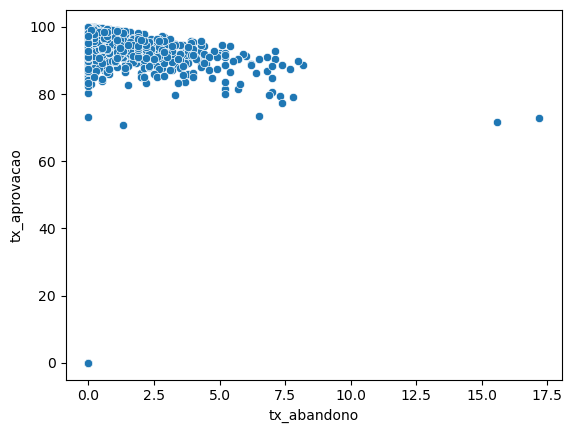

In [20]:
sns.scatterplot(data = ap, x = "tx_abandono", y = "tx_aprovacao")

<Axes: xlabel='tx_aprovacao', ylabel='tx_abandono'>

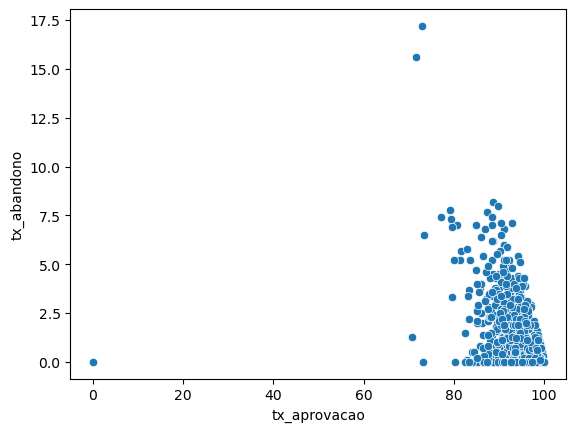

In [21]:
sns.scatterplot(data = ap, x = "tx_aprovacao", y = "tx_abandono")

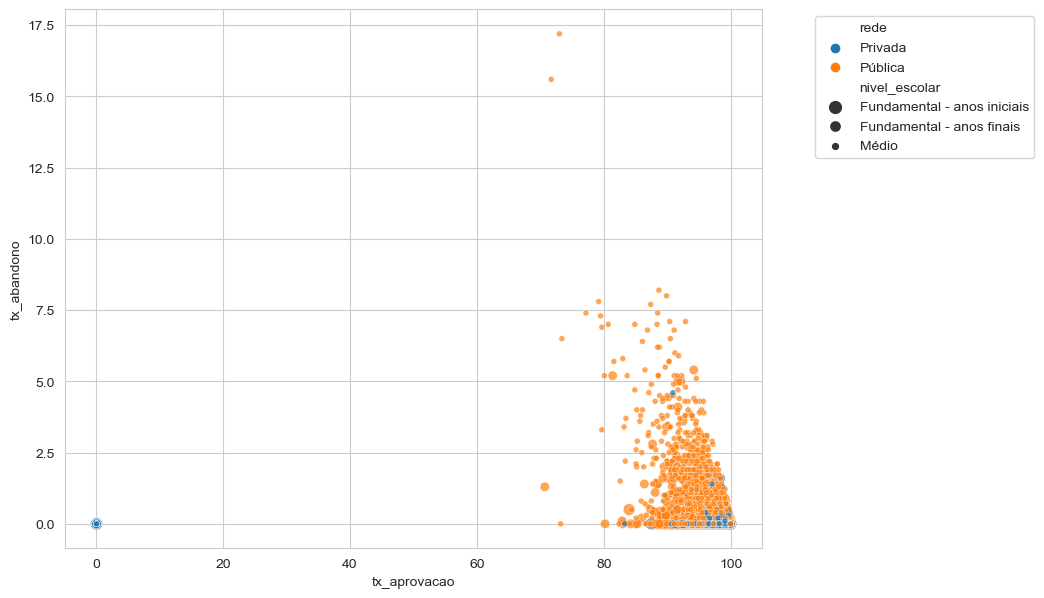

In [34]:
plt.figure(figsize = (9, 7))

sns.set_style("whitegrid")

sns.scatterplot(data = ap, x = "tx_aprovacao", y = "tx_abandono",
               hue = "rede", alpha = 0.7, 
               size = "nivel_escolar");

plt.legend(loc = "upper right", bbox_to_anchor = (1.4, 1))

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tx_aprovacao', ylabel='Count'>

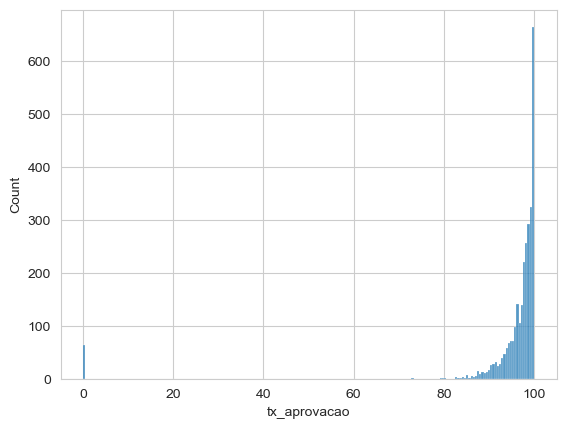

In [42]:
sns.histplot(data = ap, x = "tx_aprovacao")

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


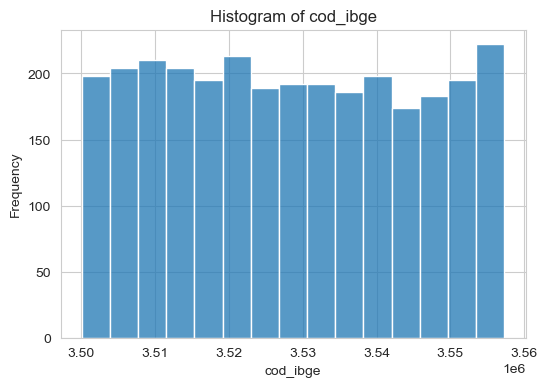

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


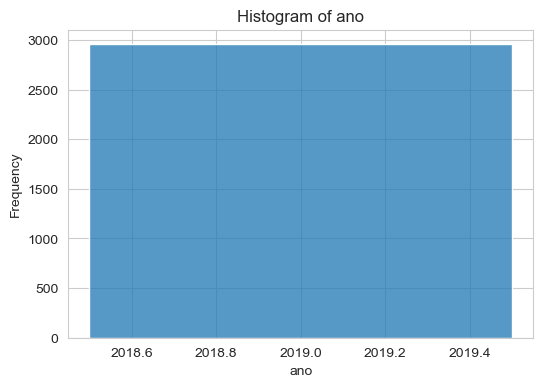

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


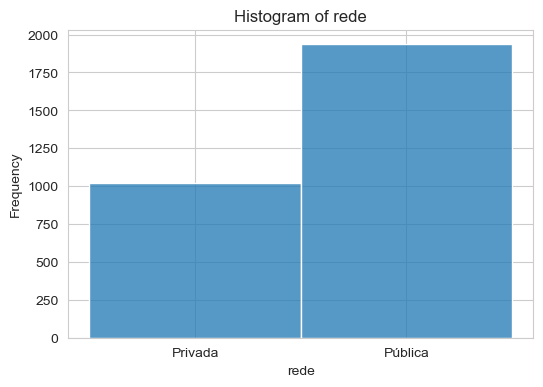

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


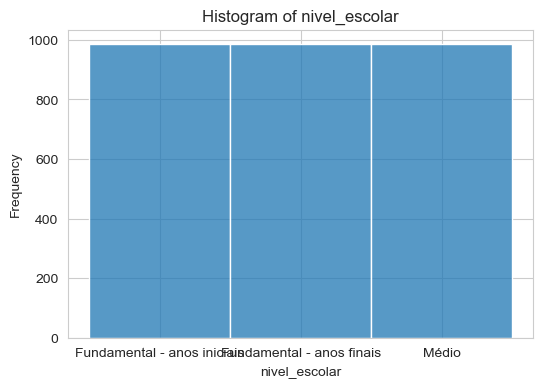

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


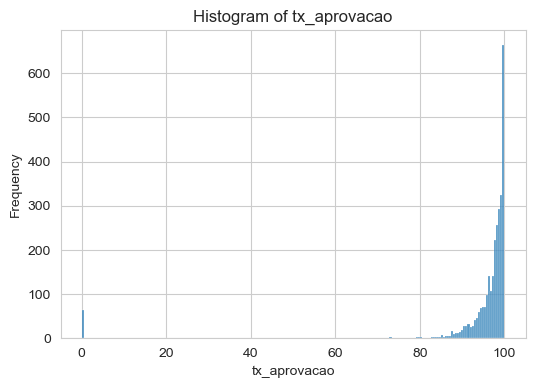

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


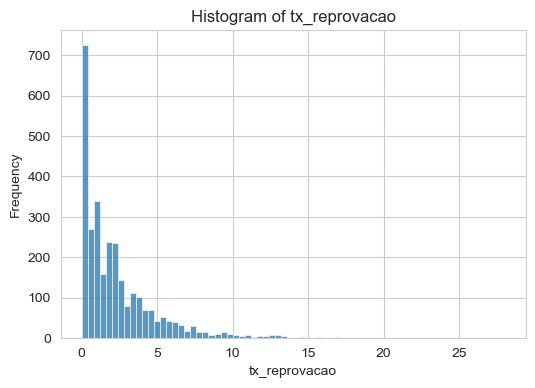

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


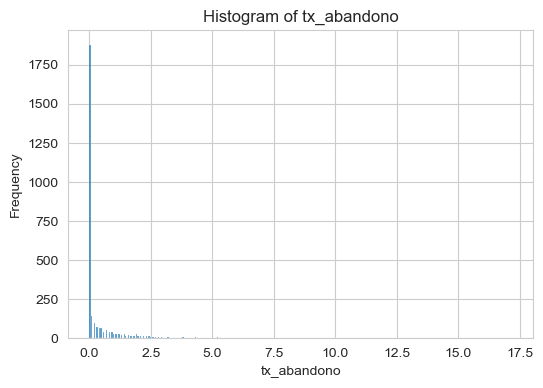

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


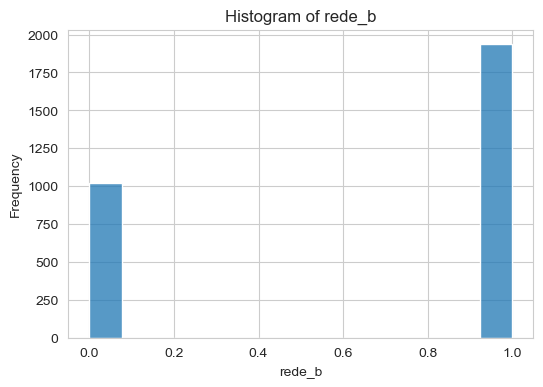

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


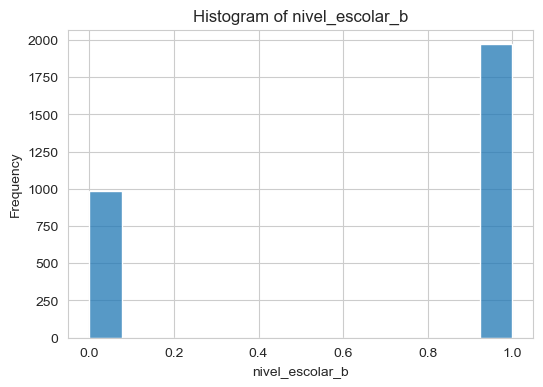

In [45]:
for column in ap.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=ap, x=column)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### Splitting the Dataset

In [49]:
y = ap["rede"]
X = ap.iloc[:, [4, 5, 6]].values

In [50]:
y

0       Privada
1       Pública
2       Pública
3       Privada
4       Pública
         ...   
2950    Pública
2951    Privada
2952    Pública
2953    Privada
2954    Pública
Name: rede, Length: 2955, dtype: object

In [51]:
X

array([[99.5,  0.5,  0. ],
       [98.4,  1.5,  0.1],
       [95.7,  4.3,  0. ],
       ...,
       [93.8,  5. ,  1.2],
       [ 0. ,  0. ,  0. ],
       [98.5,  0.9,  0.6]])

### K-means

In [53]:
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 12)

y_kmeans = kmeans.fit_predict(X)

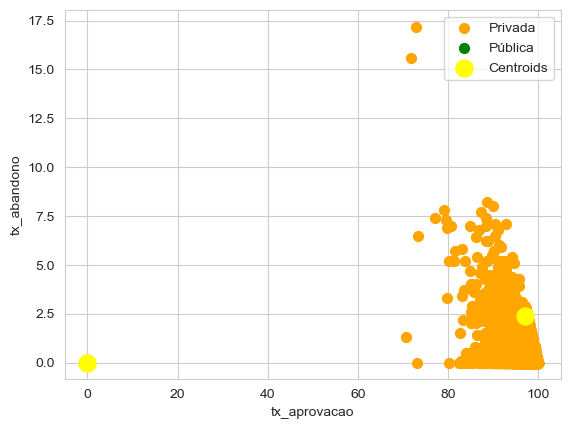

In [56]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 50, c = "orange", label = "Privada")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 50, c = "green", label = "Pública")

#FIRST NUMBER IS CLUSTER
#SECOND NUMBER IS MY COLUMNS 
#WHEN I STORED MY DATASET IN THE "X" I CREATED NEW COLUMNS
#SO BEFORE IT WAS COLUMNS 3 AND 5 AND NOW IT IS RESET, SO IT IS 0 AND 1


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel("tx_aprovacao")
plt.ylabel("tx_abandono")

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 